# 데이터 분석 프로세스(일반적인 과정)
- 주제 선정 : 분석을 통해 얻고 싶은 결과 무엇인지 설정(요구사항 구체화, 목적명확히)
- 데이터 수집 : 직접수집  or 최근에는 다양한 데이터 무료 제공받을 수 있음 (공공데이터포털https://www.data.go.kr,   서울시 정보소통광장, 국가통계포털...)
- 데이터 처리: 분석이 편리하도록 처리하는과정 (누락, 잘못된값 존재, 목적에 맞지 않는 데이타존재 가능-
              - 전체 데이타 중에서 정제(Data Cleaning): 수정/제거,
                데이타 타이딩(Data tidying): 알아보기 쉽게 구조화하는 절차
               이라는 정리과정
- 데이타 분석:  통계적 데이터 분석, 머신러닝활용 분석 많이 수행 하고 각 데이타간의 관계 파악 하거나 과거데이             타를 통행 미래를 예측하기도 합니다. 효과적으로 인사이트 얻기위해 시각화 방법을 이용하기도 합니다.
- 정보 도출: 데이터 분석 과정으로 도출된 결과에서 의미를 발견하는 단계 인데 혹시라도 검증하는 과정에서 잘못된 부분 수정후 다시실행

### 무료로 데이터 제공받는 경우 (깃허브에서 데이터파일 다운로드)

In [5]:
import requests

# 깃허브의 파일 url
url  = 'https://github.com/wikibook/python-for-data-analysis-rev/raw/master/readme.txt'

# url에 해당하는 데이타 파일 내려받음
r = requests.get(url)

# 파일을 저장할 폴더와 파일명을 지정
file_name = 'D:/dev/myPyCode/data/readme.txt'

# 내려받은 파일을 지정한 폴더에 저장
with open(file_name, 'wb') as f:
    f.write(r.content)


### 데이터에서 결측치 확인 및 처리

In [8]:
import pandas as pd
data_file = "D:/dev/myPyCode/data/missing_data_test.csv"

df = pd.read_csv(data_file, encoding = "cp949", index_col = "연도")
df

,제품1,제품2,제품3,제품4
연도,,,,
2015,250.0,150,NaN,NaN
2016,200.0,160,170.0,NaN
2017,150.0,200,100.0,150.0
2018,120.0,230,130.0,170.0
2019,NaN,250,140.0,NaN


In [10]:
df.isnull()

,제품1,제품2,제품3,제품4
연도,,,,
2015,False,False,True,True
2016,False,False,False,True
2017,False,False,False,False
2018,False,False,False,False
2019,True,False,False,True


In [14]:
df.isnull().sum()

제품1    1
제품2    0
제품3    1
제품4    3
dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, 2015 to 2019
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   제품1     4 non-null      float64
 1   제품2     5 non-null      int64  
 2   제품3     4 non-null      float64
 3   제품4     2 non-null      float64
dtypes: float64(3), int64(1)
memory usage: 200.0 bytes


####  결측치 처리

In [23]:
# 인덱스가 2019년도 행 데이터 제거
df.drop(index=[2019])

,제품1,제품2,제품3,제품4
연도,,,,
2015,250.0,150,NaN,NaN
2016,200.0,160,170.0,NaN
2017,150.0,200,100.0,150.0
2018,120.0,230,130.0,170.0


In [25]:
# 제품3과 제품 4 열을 모두 제거
df.drop(columns=['제품3', '제품4'])

,제품1,제품2
연도,,
2015,250.0,150
2016,200.0,160
2017,150.0,200
2018,120.0,230
2019,NaN,250


In [27]:
# 값이 없는 셀 모두 제거
df.drop(index=[2019], columns=['제품3','제품4'])

,제품1,제품2
연도,,
2015,250.0,150
2016,200.0,160
2017,150.0,200
2018,120.0,230


In [29]:
df

,제품1,제품2,제품3,제품4
연도,,,,
2015,250.0,150,NaN,NaN
2016,200.0,160,170.0,NaN
2017,150.0,200,100.0,150.0
2018,120.0,230,130.0,170.0
2019,NaN,250,140.0,NaN


In [35]:
df.dropna()  # 기본 행 axis=0 : 행

,제품1,제품2,제품3,제품4
연도,,,,
2017,150.0,200,100.0,150.0
2018,120.0,230,130.0,170.0


In [37]:
# 제품 1에 에 결측치 있는 행을 제거
df.dropna(axis=0, subset=['제품1'])

,제품1,제품2,제품3,제품4
연도,,,,
2015,250.0,150,NaN,NaN
2016,200.0,160,170.0,NaN
2017,150.0,200,100.0,150.0
2018,120.0,230,130.0,170.0


In [39]:
# 결측치가 있는 열을 제거
df.dropna(axis=1)

,제품2
연도,
2015,150
2016,160
2017,200
2018,230
2019,250


In [41]:
# 2015인 행에서 결측치가 있는 열을 제거
df.dropna(axis=1, subset=[2015])

,제품1,제품2
연도,,
2015,250.0,150
2016,200.0,160
2017,150.0,200
2018,120.0,230
2019,NaN,250


In [43]:
df.dropna(axis=1, subset=[2016, 2019])

,제품2,제품3
연도,,
2015,150,NaN
2016,160,170.0
2017,200,100.0
2018,230,130.0
2019,250,140.0


In [45]:
# 결측치  채움
df.fillna(0)

,제품1,제품2,제품3,제품4
연도,,,,
2015,250.0,150,0.0,0.0
2016,200.0,160,170.0,0.0
2017,150.0,200,100.0,150.0
2018,120.0,230,130.0,170.0
2019,0.0,250,140.0,0.0


In [47]:
# df.fillna(method='bfill')  #  below 아래 값을 이용 현재위치 채움  
df.bfill()

,제품1,제품2,제품3,제품4
연도,,,,
2015,250.0,150,170.0,150.0
2016,200.0,160,170.0,150.0
2017,150.0,200,100.0,150.0
2018,120.0,230,130.0,170.0
2019,NaN,250,140.0,NaN


In [49]:
# df.fillna(method='ffill')
df.ffill()  # front 앞에  값을 현재값에 채움

C:\Users\Kosmo\AppData\Local\Temp\ipykernel_11740\1193302488.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill')


,제품1,제품2,제품3,제품4
연도,,,,
2015,250.0,150,NaN,NaN
2016,200.0,160,170.0,NaN
2017,150.0,200,100.0,150.0
2018,120.0,230,130.0,170.0
2019,120.0,250,140.0,170.0


In [53]:
# 지정한 열(컬럼)의 결측치만 특정한 값으로 채움
values = {'제품1': 100, '제품4': 400 }
df.fillna(value=values)

,제품1,제품2,제품3,제품4
연도,,,,
2015,250.0,150,NaN,400.0
2016,200.0,160,170.0,400.0
2017,150.0,200,100.0,150.0
2018,120.0,230,130.0,170.0
2019,100.0,250,140.0,400.0


#### 데이터의 요약 및 재구성


In [56]:
import pandas as pd
data_file = 'D:/dev/myPyCode/data/total_sales_data.csv'
df_sales = pd.read_csv(data_file)
df_sales

,매장명,제품종류,모델명,판매,재고
0,A,스마트폰,S1,1,2
1,A,스마트폰,S2,2,5
2,A,TV,V1,3,5
3,B,스마트폰,S2,4,6
4,B,스마트폰,S1,5,8
5,B,TV,V1,6,9
6,C,스마트폰,S2,2,4
7,C,TV,V1,3,6
8,C,TV,V2,7,9


In [58]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   매장명     9 non-null      object
 1   제품종류    9 non-null      object
 2   모델명     9 non-null      object
 3   판매      9 non-null      int64 
 4   재고      9 non-null      int64 
dtypes: int64(2), object(3)
memory usage: 492.0+ bytes


In [60]:
# 매장별로 들어있는 데이터 개수 
df_sales['매장명'].value_counts()

매장명
A    3
B    3
C    3
Name: count, dtype: int64

In [62]:
# 제품종류 열의 구성을 알고싶다면
df_sales['제품종류'].value_counts()

제품종류
스마트폰    5
TV      4
Name: count, dtype: int64

In [64]:
# 매장명, 제품종류, 모델명으로 그룹을 만들어서 판매와 재고수량 파악
df_sales.pivot_table(index=["매장명", "제품종류", "모델명"],
                     values=["판매", "재고"], aggfunc='sum')

재고  판매
매장명 제품종류 모델명        
A   TV   V1    5   3
    스마트폰 S1    2   1
         S2    5   2
B   TV   V1    9   6
    스마트폰 S1    8   5
         S2    6   4
C   TV   V1    6   3
         V2    9   7
    스마트폰 S2    4   2

In [68]:
# 매장별로 제품 종류 에 따른 재고와 판매수량 
df_sales.pivot_table(index='매장명', columns = ['제품종류'],
                     values=['판매', '재고'], aggfunc='sum')

재고       판매     
제품종류  TV 스마트폰  TV 스마트폰
매장명                   
A      5    7   3    3
B      9   14   6    9
C     15    4  10    2

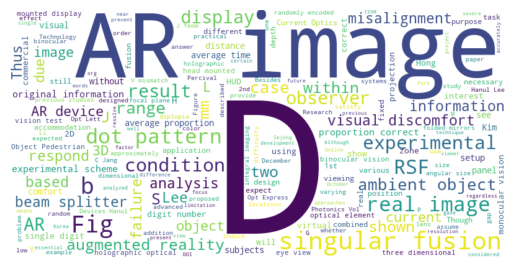

In [84]:
# 문자열데이터  생텍쥐베리가 쓴 '어린왕자' 책의 영어 텍스트파일
from wordcloud import WordCloud
import matplotlib.pyplot as plt
file_name = 'D:/dev/myPyCode/data/leehanul.txt'

with open(file_name, encoding="utf-8") as f:
    text = f.read() # 파일 내용 전체
# 이미지 생성
wordcloud_image = WordCloud(background_color='white', max_font_size=300, width=800, height=400).generate(text)

# 생성한 워드 클라우드 이미지를 화면 표시
plt.imshow(wordcloud_image, interpolation='bilinear')
plt.axis('off')
plt.show()

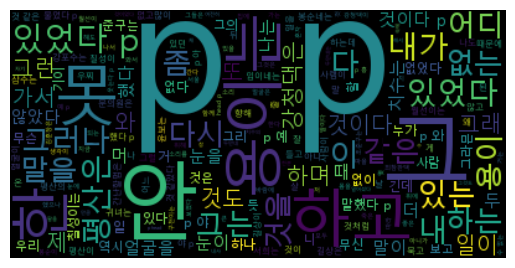

In [86]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

file_name = 'D:/dev/myPyCode/data/BEXX0003.txt'
with open(file_name, encoding="utf-16") as f:
    text = f.read()

korean_font_path = 'C:/Windows/Fonts/malgun.ttf' # 한글 폰트(맑은 고딕) 지정
wordcloud_image = WordCloud(font_path=korean_font_path).generate(text)

plt.imshow(wordcloud_image, interpolation='bilinear')
plt.axis("off")
plt.show()


In [88]:
image_file_name = 'D:/dev/myPyCode/figures/toji.png'
wordcloud_image.to_file(image_file_name)
plt.show()

### 타이타닉 EMS 분석

In [95]:
import pandas as pd
titanic = pd.read_csv('D:/dev/myPyCode/data/titanic.csv')
titanic.info()  # 몇건의 데이타인지, 컬럼 항목  null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: ylabel='Frequency'>

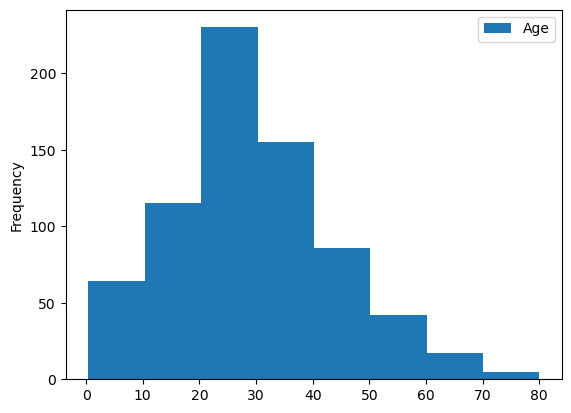

In [97]:
titanic.plot(kind='hist', y='Age', bins=8)
# 1. 타이타닉의 승객은 20대와 30대가 가장 많다

<Axes: xlabel='Age', ylabel='Fare'>

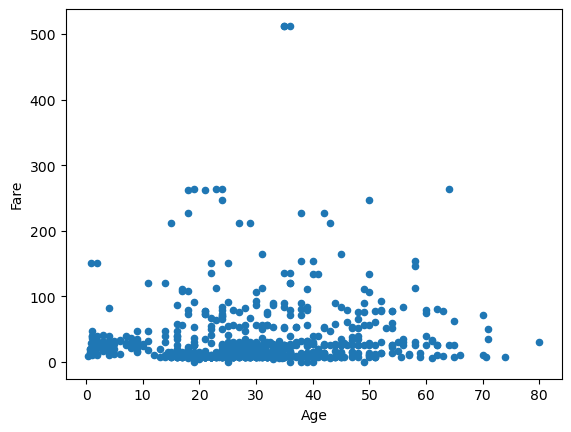

In [99]:
# 가장 높은 요금을 낸사람  - 가장 높은 요금을 낸 사람은 30대이다
titanic.plot(kind='scatter', x='Age', y='Fare')

In [101]:
# 3. 생존자가 사망자보다 더 많다       342 < 549 사망자 가 더많다
titanic['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [103]:
#4. 3등실이 가장 많이 탑승
titanic['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

<Axes: xlabel='Pclass', ylabel='Survived'>

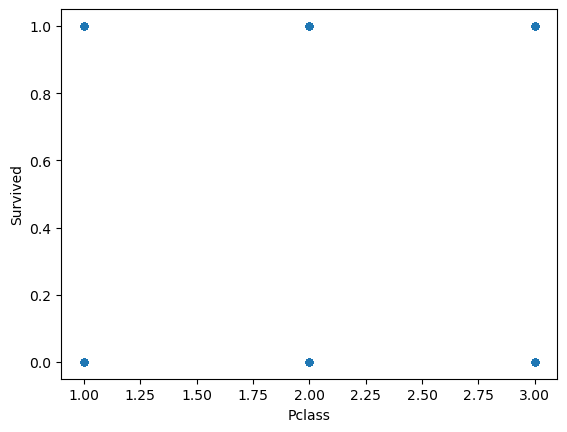

In [105]:
# 5. 객실 등급별 생존률 분포
titanic.plot(kind='scatter', x='Pclass', y='Survived')

<Axes: xlabel='Pclass', ylabel='Density'>

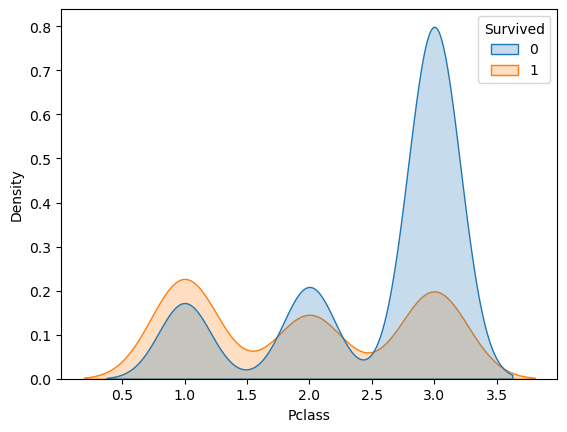

In [109]:
import seaborn as sns
# 5. 객실 등급별 생존률 분포     -   생존률은 1등실이 가장 높다
sns.kdeplot(x='Pclass', data=titanic, hue='Survived', fill=True)

<Axes: xlabel='Survived', ylabel='Age'>

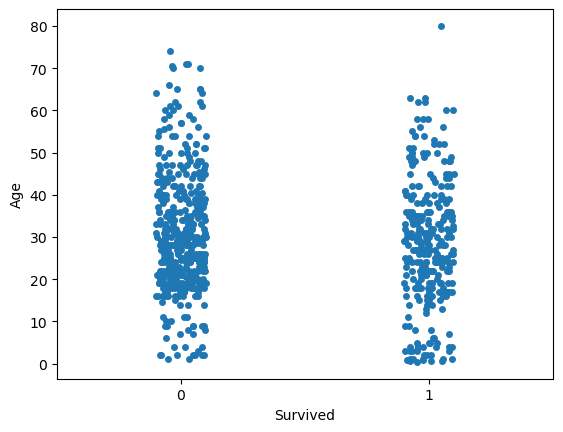

In [111]:
# 생존여부 나이분포
sns.stripplot(data=titanic, x='Survived', y='Age')

<Axes: xlabel='Survived', ylabel='Age'>

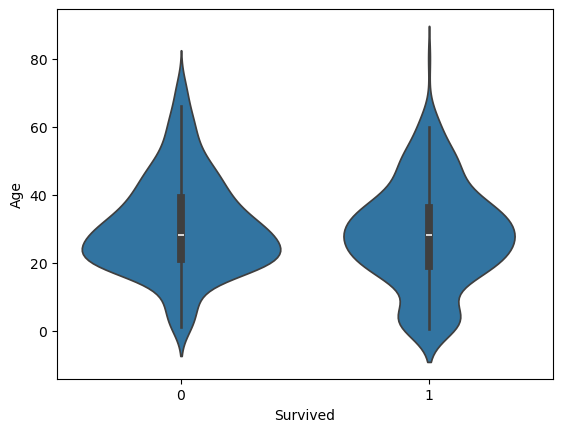

In [113]:
sns.violinplot(data=titanic, x='Survived', y='Age')
# 따라서 나이가 어릴수록 생존율이 높다고 하긴 어렵다

<Axes: xlabel='Survived', ylabel='Age'>

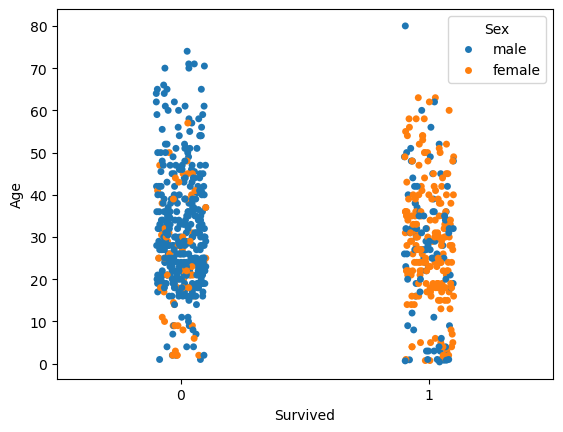

In [117]:
sns.stripplot(data=titanic, x='Survived', y='Age', hue='Sex')
# 나이보다는 확실히 성별에 영향을 많이 받았다는걸 알수 있습니다.